In [40]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
City_Ride = pd.merge(ride_data,city_data,how='left',on='city')

# Display the data table for preview
City_Ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

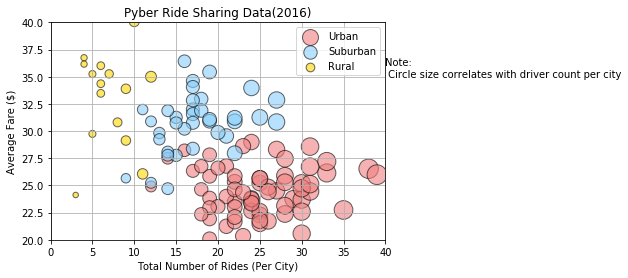

In [65]:
# Obtain the x and y coordinates for each of the three city types

    # 1) for urban cities:
urban = City_Ride[City_Ride["type"] == "Urban"]
urban_rides = urban.groupby(["city"]).count()["ride_id"]
urban_fare = urban.groupby(["city"]).mean()["fare"]
urban_drivers = urban.groupby(["city"]).count()["driver_count"]

    # 2) for suburban cities:
suburban = City_Ride[City_Ride["type"] == "Suburban"]
suburban_rides = suburban.groupby(["city"]).count()["ride_id"]
suburban_fare = suburban.groupby(["city"]).mean()["fare"]
suburban_drivers = suburban.groupby(["city"]).count()["driver_count"]    
    
    # 3) for rural cities:
rural = City_Ride[City_Ride["type"] == "Rural"]
rural_rides = rural.groupby(["city"]).count()["ride_id"]
rural_fare = rural.groupby(["city"]).mean()["fare"]
rural_drivers = rural.groupby(["city"]).count()["driver_count"]    

# Build the scatter plots for each city types
# import matplotlib.patches as mpatches

plt.scatter(urban_rides, urban_fare, s=10*urban_drivers, c="lightcoral", 
            edgecolor="black", linewidths=1, marker="o", alpha=.6, label="Urban")

plt.scatter(suburban_rides, suburban_fare, s=10*suburban_drivers, c="lightskyblue", 
            edgecolor="black", linewidths=1, marker="o", alpha=.6, label="Suburban")

plt.scatter(rural_rides, rural_fare, s=10*rural_drivers, c="gold", 
            edgecolor="black", linewidths=1, marker="o", alpha=.6, label="Rural")

# Create a legend
plt.legend(loc="upper right")
plt.xlim(0, 40)
plt.ylim(20, 40)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data(2016)")
plt.grid(True)

# Incorporate a text label regarding circle size
plt.text(40,35,'Note:\n Circle size correlates with driver count per city')

# Save Figure
plt.savefig("City_Ride.png")

In [42]:
# Show plot
plt.show()

## Total Fares by City Type

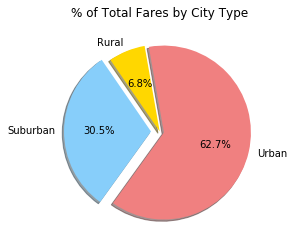

In [63]:
# Calculate Type Percents
fares_per = City_Ride.groupby(["type"])["fare"].sum()
    #print(fares_per)
    
# Build Pie Chart
plt.pie(fares_per, explode=[0, 0.1, 0.05], 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        autopct='%1.1f%%', shadow=True, startangle=100)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Fares_Percentage.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

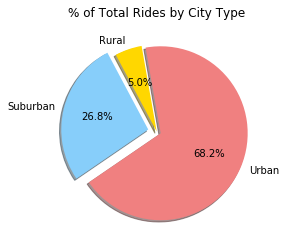

In [64]:
# Calculate Ride Percents
rides_per = City_Ride.groupby(["type"])["ride_id"].sum()

# Build Pie Chart
plt.pie(rides_per, explode=[0, 0.1, 0.05], 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        autopct='%1.1f%%', shadow=True, startangle=100)

plt.title("% of Total Rides by City Type")

# # Save Figure
plt.savefig("Rides_Percentage.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

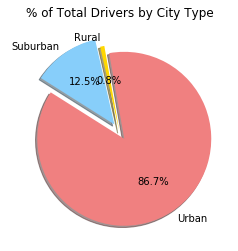

In [67]:
# Calculate Driver Percents
drivers_per = City_Ride.groupby(["type"])["driver_count"].sum()

# Build Pie Charts
plt.pie(drivers_per, explode=[0, 0.1, 0.1], 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        autopct='%1.1f%%', shadow=True, startangle=100)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Drivers_Percentage.png")

In [ ]:
# Show Figure
plt.show()